In [457]:
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [458]:
df = pd.read_csv('Heart_DF.csv')

In [459]:
#Data Exploration

In [460]:
df

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                303 non-null    int64  
 1   Age                       303 non-null    int64  
 2   Sex                       303 non-null    int64  
 3   Chest_Pain                303 non-null    int64  
 4   Resting_Blood_Pressure    303 non-null    int64  
 5   Colestrol                 303 non-null    int64  
 6   Fasting_Blood_Sugar       303 non-null    int64  
 7   Rest_ECG                  303 non-null    int64  
 8   MAX_Heart_Rate            303 non-null    int64  
 9   Exercised_Induced_Angina  303 non-null    int64  
 10  ST_Depression             303 non-null    float64
 11  Slope                     303 non-null    int64  
 12  Major_Vessels             303 non-null    object 
 13  Thalessemia               303 non-null    object 
 14  Target    

In [462]:
df['Target'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [463]:
df.columns
df[df['Target']==0]

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
7,7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,288,56,1,2,130,221,0,2,163,0,0.0,1,0,7,0
289,289,56,1,2,120,240,0,0,169,0,0.0,3,0,3,0
291,291,55,0,2,132,342,0,0,166,0,1.2,1,0,3,0
295,295,41,1,2,120,157,0,0,182,0,0.0,1,0,3,0


In [464]:
df.describe()

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,75.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,151.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,226.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,302.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [465]:
#sns.pairplot(df.drop(['Target','Exercised_Induced_Angina','Slope'],axis=1))

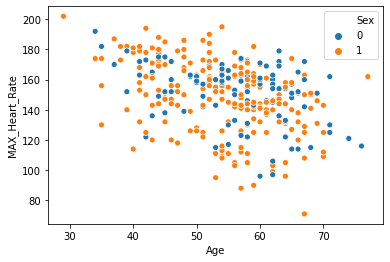

In [466]:
sns.scatterplot(x=df['Age'],y=df['MAX_Heart_Rate'], hue=df['Sex'])

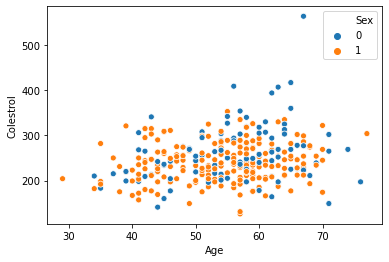

In [467]:
sns.scatterplot(x=df['Age'],y=df['Colestrol'], hue=df['Sex'])

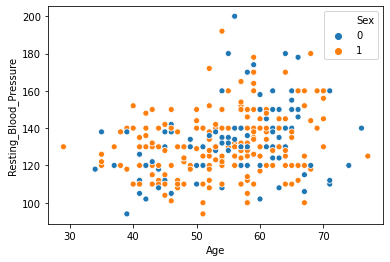

In [468]:
sns.scatterplot(x=df['Age'],y=df['Resting_Blood_Pressure'], hue=df['Sex'])

In [469]:
#It looks like a categorization problem 0 to 4

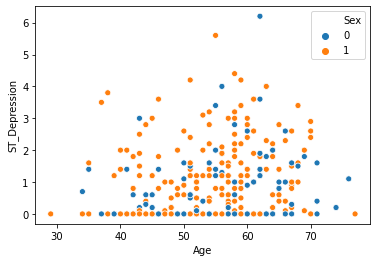

In [470]:
sns.scatterplot(x=df['Age'],y=df['ST_Depression'], hue=df['Sex'])

In [471]:
#Discoveries : Sex doesnt seem to have relationship with any of the other variables. The two
# groups seem homgenous
# TO DO: 
# - Find relationship between 2 medical parameters with sex and age as hue
# - categorize age in subgroups to have better data viz
# - PCA to do

In [472]:
# to create age cat
bins = [0, 25, 50, 75,100]
df['AgeCat']= pd.cut(df['Age'], bins)
df

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target,AgeCat
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,"(50, 75]"
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,"(50, 75]"
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,"(50, 75]"
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,"(25, 50]"
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,"(25, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,"(25, 50]"
299,299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,"(50, 75]"
300,300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,"(50, 75]"
301,301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,"(50, 75]"


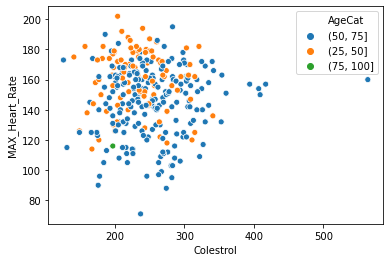

In [473]:
sns.scatterplot(x=df['Colestrol'],y=df['MAX_Heart_Rate'], hue=df['AgeCat'])

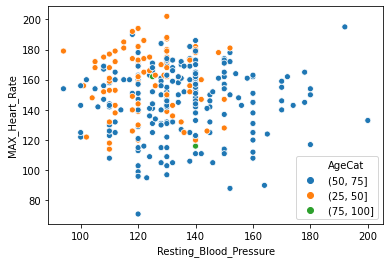

In [474]:
sns.scatterplot(x=df['Resting_Blood_Pressure'],y=df['MAX_Heart_Rate'], hue=df['AgeCat'])

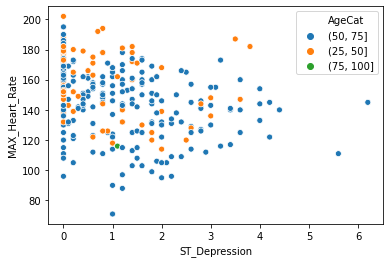

In [475]:
sns.scatterplot(x=df['ST_Depression'],y=df['MAX_Heart_Rate'], hue=df['AgeCat'])

In [476]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [477]:
df.drop('Unnamed: 0',axis=1)

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target,AgeCat
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,"(50, 75]"
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,"(50, 75]"
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,"(50, 75]"
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,"(25, 50]"
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,"(25, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,"(25, 50]"
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,"(50, 75]"
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,"(50, 75]"
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,"(50, 75]"


In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Unnamed: 0                303 non-null    int64   
 1   Age                       303 non-null    int64   
 2   Sex                       303 non-null    int64   
 3   Chest_Pain                303 non-null    int64   
 4   Resting_Blood_Pressure    303 non-null    int64   
 5   Colestrol                 303 non-null    int64   
 6   Fasting_Blood_Sugar       303 non-null    int64   
 7   Rest_ECG                  303 non-null    int64   
 8   MAX_Heart_Rate            303 non-null    int64   
 9   Exercised_Induced_Angina  303 non-null    int64   
 10  ST_Depression             303 non-null    float64 
 11  Slope                     303 non-null    int64   
 12  Major_Vessels             303 non-null    object  
 13  Thalessemia               303 non-null    object  

In [479]:
value=['?']
df = df[df['Thalessemia'].isin(value)==False]#'Thalessemia']]
df = df[df['Major_Vessels'].isin(value)==False]
df

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target,AgeCat
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,"(50, 75]"
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,"(50, 75]"
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,"(50, 75]"
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,"(25, 50]"
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,"(25, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1,"(50, 75]"
298,298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,"(25, 50]"
299,299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,"(50, 75]"
300,300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,"(50, 75]"


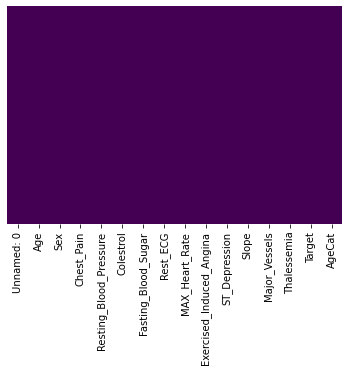

In [480]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [481]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [482]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Chest_Pain', 'Resting_Blood_Pressure',
       'Colestrol', 'Fasting_Blood_Sugar', 'Rest_ECG', 'MAX_Heart_Rate',
       'Exercised_Induced_Angina', 'ST_Depression', 'Slope', 'Major_Vessels',
       'Thalessemia', 'Target', 'AgeCat'],
      dtype='object')

In [483]:
X = df.drop(['Target','AgeCat','Unnamed: 0'],axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=df['Target'])

In [484]:
y_test[y_test == 4]
#y_train[y_train==4]

24     4
47     4
285    4
153    4
Name: Target, dtype: int64

In [485]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=200)

In [486]:
rfc_pred=rfc.predict(X_test)

In [487]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[44  3  0  1  0]
 [ 9  2  2  3  0]
 [ 5  4  1  1  0]
 [ 2  5  2  1  1]
 [ 0  1  1  2  0]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        48
           1       0.13      0.12      0.13        16
           2       0.17      0.09      0.12        11
           3       0.12      0.09      0.11        11
           4       0.00      0.00      0.00         4

    accuracy                           0.53        90
   macro avg       0.23      0.24      0.23        90
weighted avg       0.45      0.53      0.48        90



In [488]:
df.groupby('Target').count()

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,AgeCat
Target,,,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160
1,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
2,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
3,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [489]:
#TODO 
# - Test new models
# - Do a PCA test

In [490]:
#PCA Test
#1-Scale Data
from sklearn.preprocessing import StandardScaler

In [491]:
scaler = StandardScaler()
scaler.fit(df.drop('AgeCat',axis=1))

StandardScaler()

In [492]:
scaled_data = scaler.transform(df.drop('AgeCat',axis=1))

In [493]:
#2 - principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [494]:
x_pca = pca.transform(scaled_data)

Text(0, 0.5, 'Second Principal Component')

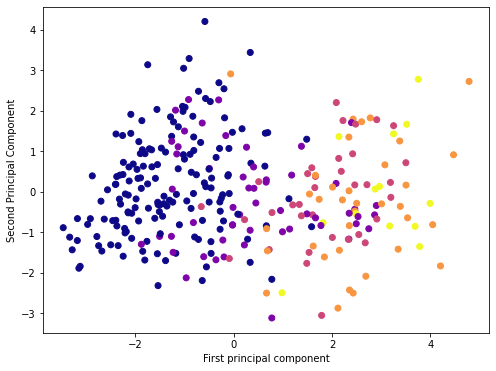

In [495]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [496]:
df_comp = pd.DataFrame(pca.components_,columns=df.columns.drop('AgeCat'))

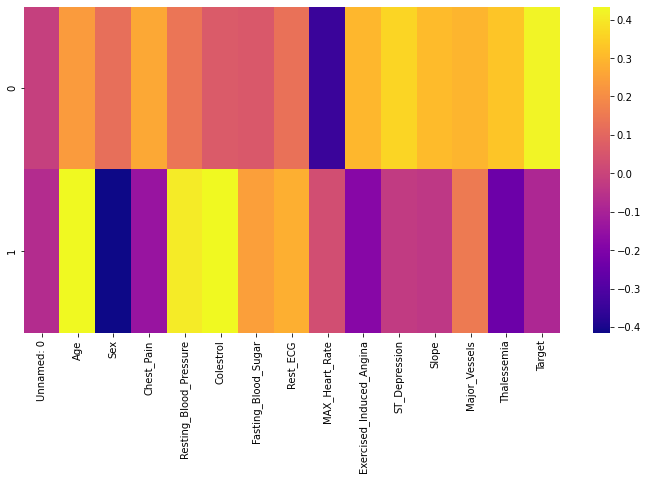

In [497]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [498]:
#Not very interesting, we see people in the category 0 and 1 are clustered together
# vs 2 to 4 in a very homogenous way. Given that I want to predict the distinct category

In [499]:
#Changing cat 1,2,3,4 into 1
df.loc[df['Target'] == 2, 'Target'] = 1
df.loc[df['Target'] == 3, 'Target'] = 1
df.loc[df['Target'] == 4, 'Target'] = 1

In [500]:
# As we can see above. Our dataset is unbalanced. Most of the records are labeled with a 0
# target (160 are 0 on a ~300 dataset)

#Let's use SMOTE technic to simulate X data

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101)
X_res, y_res=sm.fit_resample(X_train,y_train)

In [501]:
rfcSim= RandomForestClassifier(n_estimators = 200)
rfcSim.fit(X_res, y_res)

RandomForestClassifier(n_estimators=200)

In [502]:
X_res

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia
0,65,1,4,110,248,0,2,158,0,0.600000,1,2,6
1,57,1,4,110,201,0,0,126,1,1.500000,2,0,6
2,69,0,1,140,239,0,0,151,0,1.800000,1,2,3
3,51,0,3,140,308,0,2,142,0,1.500000,1,1,3
4,55,0,4,180,327,0,1,117,1,3.400000,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,58,1,3,115,228,0,2,161,0,2.445354,2,1.10929,6.89071
556,60,0,3,123,228,0,2,149,0,2.034865,2,1.62018,7
557,64,0,4,148,220,0,2,114,0,1.218503,2,2.83192,6.66384
558,63,0,4,150,332,0,2,137,0,2.778414,2,3,7


In [503]:
rfcSim_pred=rfcSim.predict(X_test)

In [504]:
print(confusion_matrix(y_test,rfcSim_pred))
print(classification_report(y_test,rfcSim_pred))

[[43  3  0  1  1]
 [ 7  3  1  5  0]
 [ 1  6  1  3  0]
 [ 0  5  2  1  3]
 [ 0  1  1  2  0]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        48
           1       0.17      0.19      0.18        16
           2       0.20      0.09      0.13        11
           3       0.08      0.09      0.09        11
           4       0.00      0.00      0.00         4

    accuracy                           0.53        90
   macro avg       0.26      0.25      0.25        90
weighted avg       0.51      0.53      0.52        90



In [505]:
# Testing out Logistic regression
from sklearn.linear_model import LogisticRegression
logmod=LogisticRegression()
logmod.fit(X_res,y_res)

C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [506]:
logmod_pred=logmod.predict(X_test)

In [507]:
print(confusion_matrix(y_test,logmod_pred))
print(classification_report(y_test,logmod_pred))

[[38  6  3  0  1]
 [ 4  4  4  2  2]
 [ 1  3  3  1  3]
 [ 0  0  4  4  3]
 [ 0  0  1  2  1]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.84        48
           1       0.31      0.25      0.28        16
           2       0.20      0.27      0.23        11
           3       0.44      0.36      0.40        11
           4       0.10      0.25      0.14         4

    accuracy                           0.56        90
   macro avg       0.39      0.39      0.38        90
weighted avg       0.61      0.56      0.58        90



In [508]:
#To Scale data we are going to exploit
scal = StandardScaler()
scal.fit(df.drop(['AgeCat','Target','Unnamed: 0', 'Age', 'Sex'],axis=1))

StandardScaler()

In [509]:
scal_features = scal.transform(df.drop(['AgeCat','Target','Unnamed: 0', 'Age', 'Sex'],axis=1))

In [510]:
df_feat = pd.DataFrame(scal_features,columns=df.drop(['AgeCat','Target','Unnamed: 0', 'Age', 'Sex'],axis=1).columns)

In [511]:
df_feat

,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia
0,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877
1,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220
2,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577
3,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220
4,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220
...,...,...,...,...,...,...,...,...,...,...,...
292,0.873880,0.468418,-0.122330,-0.411450,-1.003419,-1.161395,1.435916,-0.734914,0.643781,-0.721976,1.172577
293,-2.240629,-1.223355,0.320744,-0.411450,-1.003419,-0.768432,-0.696419,0.124076,0.643781,-0.721976,1.172577
294,0.873880,0.693988,-1.047008,2.430427,-1.003419,-0.375469,-0.696419,2.013854,0.643781,1.411625,1.172577
295,0.873880,-0.095506,-2.241384,-0.411450,-1.003419,-1.510696,1.435916,0.124076,0.643781,0.344824,1.172577


In [512]:
X=df_feat.columns
y=df['Target']
X_train, X_test, y_train, y_test = train_test_split(scal_features,df['Target'],
                                                    test_size=0.30)

In [513]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [514]:
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [515]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[41 10]
 [15 24]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.77        51
           1       0.71      0.62      0.66        39

    accuracy                           0.72        90
   macro avg       0.72      0.71      0.71        90
weighted avg       0.72      0.72      0.72        90



In [516]:
error_rate = []

for i in range(1,200): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(abs(pred_i-y_test)))
mini = error_rate[0]
for i in range(0,len(error_rate)): 
    if (error_rate[i] < mini):
        mini = error_rate[i]
        tokeep = i

Text(0, 0.5, 'Error Rate')

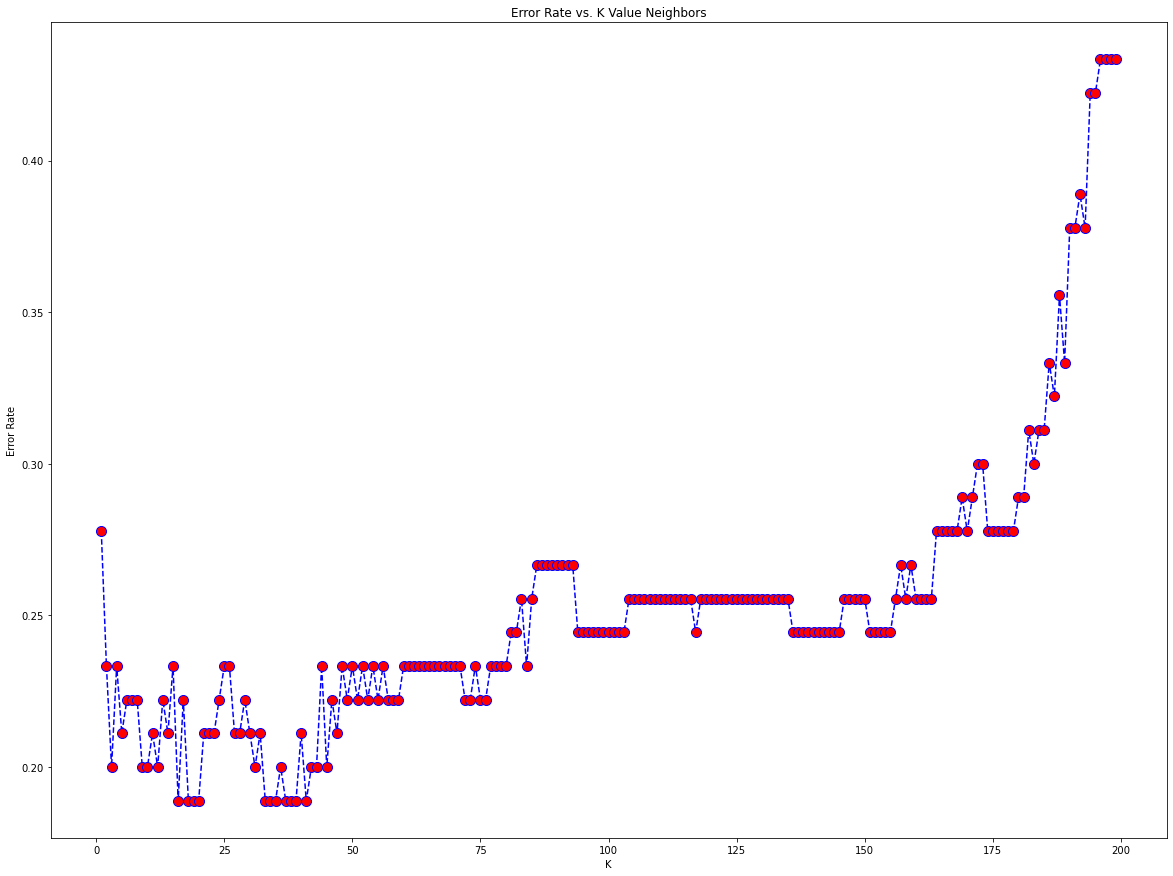

In [517]:
plt.figure(figsize=(20,15))
plt.plot(range(1,200),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value Neighbors')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [518]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
knn.fit(X_test,y_test)

KNeighborsClassifier(n_neighbors=1)

In [519]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[41 10]
 [15 24]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.77        51
           1       0.71      0.62      0.66        39

    accuracy                           0.72        90
   macro avg       0.72      0.71      0.71        90
weighted avg       0.72      0.72      0.72        90



In [520]:
#TODO
#Create new columns using getdummies and test all 3 models (See ANN example)
#Review SMOTE

In [521]:
#df.insert(2,'ST_DepressionRound',df['ST_Depression'].round())

In [522]:
#Create dummy columns to feed the model
#Create dummies with Chest_Pain, Fasting_Blood_Sugar, Rest_ECG,
#Exercised_Induced_Angina, Slope, Major_Vessels, Thalessemia
to_convert = df[['Resting_Blood_Pressure','Colestrol','MAX_Heart_Rate','Age']]
to_convert

,Resting_Blood_Pressure,Colestrol,MAX_Heart_Rate,Age
0,145,233,150,63
1,160,286,108,67
2,120,229,129,67
3,130,250,187,37
4,130,204,172,41
...,...,...,...,...
297,140,241,123,57
298,110,264,132,45
299,144,193,141,68
300,130,131,115,57


In [523]:
# Create new columns with quantiles (will be used as dummies)
#def quantileCreate():
for name, values in to_convert.iteritems():
    df.insert(2, name+'_Quart', pd.qcut(df[name], 4, labels=['Q1', 'Q2', 'Q3', 'Q4']))

In [524]:
df

,Unnamed: 0,Age,Age_Quart,MAX_Heart_Rate_Quart,Colestrol_Quart,Resting_Blood_Pressure_Quart,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target,AgeCat
0,0,63,Q4,Q2,Q2,Q4,1,1,145,233,1,2,150,0,2.3,3,0,6,0,"(50, 75]"
1,1,67,Q4,Q1,Q4,Q4,1,4,160,286,0,2,108,1,1.5,2,3,3,1,"(50, 75]"
2,2,67,Q4,Q1,Q2,Q1,1,4,120,229,0,2,129,1,2.6,2,2,7,1,"(50, 75]"
3,3,37,Q1,Q4,Q3,Q2,1,3,130,250,0,0,187,0,3.5,3,0,3,0,"(25, 50]"
4,4,41,Q1,Q4,Q1,Q2,0,2,130,204,0,2,172,0,1.4,1,0,3,0,"(25, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,297,57,Q3,Q1,Q2,Q3,0,4,140,241,0,0,123,1,0.2,2,0,7,1,"(50, 75]"
298,298,45,Q1,Q1,Q3,Q1,1,1,110,264,0,0,132,0,1.2,2,0,7,1,"(25, 50]"
299,299,68,Q4,Q2,Q1,Q4,1,4,144,193,1,0,141,0,3.4,2,2,7,1,"(50, 75]"
300,300,57,Q3,Q1,Q1,Q2,1,4,130,131,0,0,115,1,1.2,2,1,7,1,"(50, 75]"


In [525]:
to_convert

,Resting_Blood_Pressure,Colestrol,MAX_Heart_Rate,Age
0,145,233,150,63
1,160,286,108,67
2,120,229,129,67
3,130,250,187,37
4,130,204,172,41
...,...,...,...,...
297,140,241,123,57
298,110,264,132,45
299,144,193,141,68
300,130,131,115,57


In [526]:
df['Colestrol'].describe()

count    297.000000
mean     247.350168
std       51.997583
min      126.000000
25%      211.000000
50%      243.000000
75%      276.000000
max      564.000000
Name: Colestrol, dtype: float64

In [527]:
df['Resting_Blood_Pressure'].describe()

count    297.000000
mean     131.693603
std       17.762806
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: Resting_Blood_Pressure, dtype: float64

In [528]:
df['MAX_Heart_Rate'].describe()

count    297.000000
mean     149.599327
std       22.941562
min       71.000000
25%      133.000000
50%      153.000000
75%      166.000000
max      202.000000
Name: MAX_Heart_Rate, dtype: float64

In [529]:
df.groupby('Thalessemia').count()

,Unnamed: 0,Age,Age_Quart,MAX_Heart_Rate_Quart,Colestrol_Quart,Resting_Blood_Pressure_Quart,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Target,AgeCat
Thalessemia,,,,,,,,,,,,,,,,,,,
3,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164
6,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
7,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115


In [530]:
df.columns

Index(['Unnamed: 0', 'Age', 'Age_Quart', 'MAX_Heart_Rate_Quart',
       'Colestrol_Quart', 'Resting_Blood_Pressure_Quart', 'Sex', 'Chest_Pain',
       'Resting_Blood_Pressure', 'Colestrol', 'Fasting_Blood_Sugar',
       'Rest_ECG', 'MAX_Heart_Rate', 'Exercised_Induced_Angina',
       'ST_Depression', 'Slope', 'Major_Vessels', 'Thalessemia', 'Target',
       'AgeCat'],
      dtype='object')

In [531]:
#create dummies and merge all data
cp_dummies = pd.get_dummies(df['Chest_Pain'], drop_first=True, prefix='cp', dtype=int)
fbs_dummies = pd.get_dummies(df['Fasting_Blood_Sugar'],drop_first=False, prefix='fbs', dtype=int)
recg_dummies = pd.get_dummies(df['Rest_ECG'],drop_first=False,prefix='recg', dtype=int)
eia_dummies = pd.get_dummies(df['Exercised_Induced_Angina'],drop_first=False,prefix='eia', dtype=int)
s_dummies = pd.get_dummies(df['Slope'],drop_first=True,prefix='s', dtype=int)
mv_dummies = pd.get_dummies(df['Major_Vessels'],drop_first=False,prefix='mv', dtype=int)
th_dummies = pd.get_dummies(df['Thalessemia'],drop_first=True,prefix='th', dtype=int)
#mhr_dummies = pd.get_dummies(df['MAX_Heart_Rate_Quart'],drop_first=True,prefix='mhr', dtype=int)
#col_dummies = pd.get_dummies(df['Colestrol_Quart'],drop_first=True,prefix='col', dtype=int)
#rbp_dummies = pd.get_dummies(df['Resting_Blood_Pressure_Quart'],drop_first=True,prefix='col', dtype=int)
#a_dummies = pd.get_dummies(df['Age_Quart'],drop_first=True,prefix='a', dtype=int)

#mhr_dummies

# create a new df
df = pd.merge(left=df, right=cp_dummies, how='left', left_index=True, right_index=True)
df = pd.merge(left=df, right=fbs_dummies, how='left', left_index=True, right_index=True)
df = pd.merge(left=df, right=recg_dummies, how='left', left_index=True, right_index=True)
df = pd.merge(left=df, right=eia_dummies, how='left', left_index=True, right_index=True)
df = pd.merge(left=df, right=s_dummies, how='left', left_index=True, right_index=True)
df = pd.merge(left=df, right=mv_dummies, how='left', left_index=True, right_index=True)
df = pd.merge(left=df, right=th_dummies, how='left', left_index=True, right_index=True)
#df = pd.merge(left=df, right=mhr_dummies, how='left', left_index=True, right_index=True) 
#df = pd.merge(left=df, right=col_dummies, how='left', left_index=True, right_index=True)
#df = pd.merge(left=df, right=rbp_dummies, how='left', left_index=True, right_index=True)
#df = pd.merge(left=df, right=a_dummies, how='left', left_index=True, right_index=True)

In [532]:
#Create dummies for age, sex, resting blood pressure, max_heart rate, cholesterol

In [533]:
df

,Unnamed: 0,Age,Age_Quart,MAX_Heart_Rate_Quart,Colestrol_Quart,Resting_Blood_Pressure_Quart,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,...,mhr_Q4,col_Q2_x,col_Q3_x,col_Q4_x,col_Q2_y,col_Q3_y,col_Q4_y,a_Q2,a_Q3,a_Q4
0,0,63,Q4,Q2,Q2,Q4,1,1,145,233,...,0,1,0,0,0,0,1,0,0,1
1,1,67,Q4,Q1,Q4,Q4,1,4,160,286,...,0,0,0,1,0,0,1,0,0,1
2,2,67,Q4,Q1,Q2,Q1,1,4,120,229,...,0,1,0,0,0,0,0,0,0,1
3,3,37,Q1,Q4,Q3,Q2,1,3,130,250,...,1,0,1,0,1,0,0,0,0,0
4,4,41,Q1,Q4,Q1,Q2,0,2,130,204,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,297,57,Q3,Q1,Q2,Q3,0,4,140,241,...,0,1,0,0,0,1,0,0,1,0
298,298,45,Q1,Q1,Q3,Q1,1,1,110,264,...,0,0,1,0,0,0,0,0,0,0
299,299,68,Q4,Q2,Q1,Q4,1,4,144,193,...,0,0,0,0,0,0,1,0,0,1
300,300,57,Q3,Q1,Q1,Q2,1,4,130,131,...,0,0,0,0,1,0,0,0,1,0


In [534]:
df.columns

Index(['Unnamed: 0', 'Age', 'Age_Quart', 'MAX_Heart_Rate_Quart',
       'Colestrol_Quart', 'Resting_Blood_Pressure_Quart', 'Sex', 'Chest_Pain',
       'Resting_Blood_Pressure', 'Colestrol', 'Fasting_Blood_Sugar',
       'Rest_ECG', 'MAX_Heart_Rate', 'Exercised_Induced_Angina',
       'ST_Depression', 'Slope', 'Major_Vessels', 'Thalessemia', 'Target',
       'AgeCat', 'cp_2', 'cp_3', 'cp_4', 'fbs_0', 'fbs_1', 'recg_0', 'recg_1',
       'recg_2', 'eia_0', 'eia_1', 's_2', 's_3', 'mv_0', 'mv_1', 'mv_2',
       'mv_3', 'th_6', 'th_7', 'mhr_Q2', 'mhr_Q3', 'mhr_Q4', 'col_Q2_x',
       'col_Q3_x', 'col_Q4_x', 'col_Q2_y', 'col_Q3_y', 'col_Q4_y', 'a_Q2',
       'a_Q3', 'a_Q4'],
      dtype='object')

In [535]:
#Drop the columns that are the source of the dummy columns
df=df.drop(['Chest_Pain','Fasting_Blood_Sugar','Rest_ECG','Exercised_Induced_Angina','Slope',\
            'Major_Vessels','Thalessemia','AgeCat', 'Unnamed: 0', 'Age', 'Colestrol_Quart', 'Colestrol',\
           'Resting_Blood_Pressure_Quart','Resting_Blood_Pressure','Age_Quart','MAX_Heart_Rate_Quart',\
            'MAX_Heart_Rate'],axis=1)
df

,Sex,ST_Depression,Target,cp_2,cp_3,cp_4,fbs_0,fbs_1,recg_0,recg_1,...,mhr_Q4,col_Q2_x,col_Q3_x,col_Q4_x,col_Q2_y,col_Q3_y,col_Q4_y,a_Q2,a_Q3,a_Q4
0,1,2.3,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,1,1.5,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,1,2.6,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,3.5,0,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,0
4,0,1.4,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0,0.2,1,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
298,1,1.2,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
299,1,3.4,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
300,1,1.2,1,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [536]:
#Train models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [537]:
#Changing cat 1,2,3,4 into 1
df.loc[df['Target'] == 2, 'Target'] = 1
df.loc[df['Target'] == 3, 'Target'] = 1
df.loc[df['Target'] == 4, 'Target'] = 1

In [538]:
X = df.drop('Target',axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)
rfcModel =  RandomForestClassifier(n_estimators=200, max_depth=5,max_features=4)

In [539]:
rfcModel.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=4, n_estimators=200)

In [540]:
rfcModel_pred = rfcModel.predict(X_test)

In [541]:
print(confusion_matrix(y_test,rfcModel_pred))
print(classification_report(y_test,rfcModel_pred))

[[37  3]
 [10 25]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        40
           1       0.89      0.71      0.79        35

    accuracy                           0.83        75
   macro avg       0.84      0.82      0.82        75
weighted avg       0.84      0.83      0.82        75



In [542]:
#Still bad F1_score. Let's try SMOTE with the dummy params
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101)
X_res, y_res=sm.fit_resample(X_train,y_train)

In [577]:
rfcModelSim= RandomForestClassifier(n_estimators = 200, max_depth=5,max_features=4)
rfcModelSim.fit(X_res, y_res)

RandomForestClassifier(max_depth=5, max_features=4, n_estimators=200)

In [578]:
rfcModelSim_pred = rfcModelSim.predict(X_test)

In [579]:
print(confusion_matrix(y_test,rfcModelSim_pred))
print(classification_report(y_test,rfcModelSim_pred))

[[38  2]
 [ 7 28]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        40
           1       0.93      0.80      0.86        35

    accuracy                           0.88        75
   macro avg       0.89      0.88      0.88        75
weighted avg       0.89      0.88      0.88        75



In [561]:
#Still no good, let's try to categorize as 0 for good and 1 as disease

In [562]:
#Changing cat 1,2,3,4 into 1
df.loc[df['Target'] == 2, 'Target'] = 1
df.loc[df['Target'] == 3, 'Target'] = 1
df.loc[df['Target'] == 4, 'Target'] = 1

In [563]:
#More balanced categories
df.groupby('Target').count()

,Sex,ST_Depression,cp_2,cp_3,cp_4,fbs_0,fbs_1,recg_0,recg_1,recg_2,...,mhr_Q4,col_Q2_x,col_Q3_x,col_Q4_x,col_Q2_y,col_Q3_y,col_Q4_y,a_Q2,a_Q3,a_Q4
Target,,,,,,,,,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,...,160,160,160,160,160,160,160,160,160,160
1,137,137,137,137,137,137,137,137,137,137,...,137,137,137,137,137,137,137,137,137,137


In [568]:
#Let's retry model
X = df.drop('Target',axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)
rfcModel =  RandomForestClassifier(n_estimators=200, max_depth=5,max_features=4)

In [569]:
rfcModel.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=4, n_estimators=200)

In [570]:
rfcModel_pred = rfcModel.predict(X_test)

In [571]:
print(confusion_matrix(y_test,rfcModel_pred))
print(classification_report(y_test,rfcModel_pred))

[[38  2]
 [10 25]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        40
           1       0.93      0.71      0.81        35

    accuracy                           0.84        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.85      0.84      0.84        75



In [572]:
#way better results! let's tweak the params
#rand state = 66 
#train_test split = 0.25
#trees = 200

In [573]:
#TODO 
# - Grid Search
# - Clean the code

In [574]:
#Let's do a grid search
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [575]:
pip = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='gini', random_state=1))
param_grid_rfc = [{
    'randomforestclassifier__max_depth':[2,5,10,100,200,300],
    'randomforestclassifier__max_features':[2, 3, 4, 5, 6,8,10,12]
}]

gs = GridSearchCV(estimator=pip,
                     param_grid = param_grid_rfc,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)

In [580]:
gs = gs.fit(X_train, y_train)
# Print the training score of the best model
print(gs.best_score_)

# Print the model parameters of the best model
print(gs.best_params_)

# Print the test score of the best model
clfRFC = gs.best_estimator_
print('Test accuracy: %.3f' % clfRFC.score(X_test, y_test))

#Can still be improved by clustering the data together (and thus creating dummy variables)

0.8337944664031621
{'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 2}
Test accuracy: 0.827


In [ ]:
#Changing all the variables as dummies didnt change the model performance significantly
#Return to old version (dummies only before mhr)